In [1]:
using ForwardDiff, Plots, NLsolve, ProgressMeter

In [2]:
include("Nodes_Quadrature.jl")

Quadrature (generic function with 1 method)

In [6]:
include("HarmonicOscillatorTools.jl")

Oscillator (generic function with 1 method)

In [7]:
omega = 1.0;
KineticEnergy,PotentialEnergy=Oscillator(omega);

In [8]:
include("DEL_Utilities.jl")

ComputeTrajectory (generic function with 1 method)

In [11]:
nodes = Nodes(2); 
c,b =  Quadrature(numQuad=2,method="G");
Ω = 1;

In [12]:
h = 0.1 ; 
DEL = DiscreteEL(KineticEnergy,PotentialEnergy,nodes,b,c,h);

In [13]:
q0=[0.,1.];  p0=[-0.5,1.];  steps = 62 ;  ts = (0:steps) * h;

q = ComputeTrajectory(DEL,q0,p0,steps;ftol=1e-14)
q_main = q[:,1:2:end]

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


2×63 Matrix{Float64}:
 0.0  -0.0499167  -0.0993347  -0.14776  …  0.139708  0.0910817  0.0415451
 1.0   1.09484     1.17874     1.25086     0.680754  0.801105   0.913452

In [14]:
p = ConjugateMomenta(DEL,q)

2×63 Matrix{Float64}:
 -0.5  -0.497502  -0.490033  -0.477668  …  -0.480085  -0.491634  -0.498271
  1.0   0.895171   0.781397   0.659816      1.23959    1.16543    1.07963

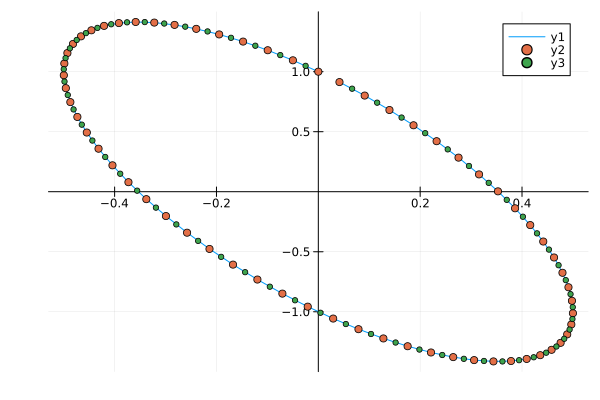

In [15]:
exact_sol(t) = (q0[1] * cos(Ω * t) + p0[1] / Ω  * sin(Ω * t) , q0[2] * cos(Ω * t) + p0[2] / Ω  * sin(Ω * t)) ; 


plot(exact_sol.(ts))
scatter!(q_main[1,:],q_main[2,:],frame=:origin)

scatter!(q[1,2:2:end-1],q[2,2:2:end-1],ms=3)